In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, linspace, arange, zeros, ones, eye, linalg, sqrt, sin,exp,pi,inf
import scipy as sp
from scipy import special, optimize, interpolate, fft, fftpack
from scipy.optimize import leastsq, curve_fit
from scipy.integrate import quad
import time
import matplotlib.gridspec as gridspec  # unequal plots
import sympy as sym
import math
%matplotlib inline
plt.rc("font",family="Times New Roman",size=15)

----
2. The planets in the solar system whose orbits deviate the most from circular are Mercury and Pluto. For Mercury it was known by the early part of the 19th century that the orientation of the axes of the ellipse that describes its orbit rotate with time. This is known as the **precession of the perihelion of Mercury** (the perihelion is the point in an orbit when a planet is nearest the Sun).  The magnitude of this precession is approximately 566 arseconds per century (an arcsecond is 1/3600 of a degree). That is, Mercury's perihelion makes one complete rotation every 230,000 years. While the precision of both the experimental measurement and the theoretical calculation of the precession of Mercury's perihelion are very impressive, the fact remained that they did not agree. It was realized that this disagreement might be evidence for some interesting new physics, and various solutions to this puzzle were proposed. This troubling discrepancy was not explained until 1917 when Einstein developed the theory of general relativity. The force law predicted by general relativity is 
    $$
    F_G \simeq \frac{GM_SM_M}{r^2}\left(1 +\frac{\alpha}{r^2}\right)
    $$
    where $M_M$ is the mass of Mercury and $\alpha\simeq 1.1\times 10^{-8}$ AU$^2$.   
     
    **Your task is to calculate the precession of the perihelion of Mercury.** 

    Since the precision rate is fairly small, we develop the algorithm as follows:

    - We calculate the rate of precession as a function of $\alpha$, with values of $\alpha$ that are much larger than the actual value for Mercury. It turns out that the rate of precession is given by $C\alpha$, where $C$ is a constant whose value we shall estimate. 
    - After we have obtained the values of $C$, we can then estimate the rate of precession for $\alpha = 1.1\times 10^{-8}$ AU$^2$, which is the case that we are really interested in.    
    
    **The* initial conditions are given based on the following considerations (see Figure 1)

    (a) the length of the semimajor axis for Mercury's orbit is $a = 0.39$ AU.
    (b) The corresponding velocity, $v_1$, can be computed based on the conservation of both energy and angular momentum over the course of an orbit. It shows
    $$
    v_1 =\sqrt{\frac{GM_S (1 - e)}{a (1 + e)}}
    $$  
    where $e = 0.206$ for Mercury. The distance from Mercury to the Sun is $r_{1}=\left(1+e\right)  a=0.47$ AU.

    <img width=400 src=mercury-initialc.png>  

    **Now* that the initial conditions are known, we can simulate the motion of Mercury. The result obtained with $\alpha = 0.01$ is shown in Figure 2. This value of $\alpha$ is much larger than the true value for Mercury. The lines drawn from the origin to the points on each orbit that are farthest from the Sun are very useful, since the angles $\theta$ the make with the $x$ axis are the amounts the orbit has precessed.  The farthest points are found by monitoring the distance of Mercury from the Sun and noting when its time derivative changes from positive to negative. 

    <img width=400 src=mercury-xy.png>

    **The* next step is to calculate the angle $\theta$ of precession as a function of time for a particular value of $\alpha$. We can show that the precession rate $d\theta/dt$ is a constant, the value of which can be calculated with the least $\chi$-square fit.
    
    **As* the next step we repeat the calculation with different values of $\alpha$ and obtain the best-fit precession rate in each case. We then plot the precession rate as a function of $\alpha$. We can find that the precession rate varies linearly with $\alpha$ and we can determine the coefficient of proportionality by using the least $\chi$-square fit. The precession rate of Mercury can be extrapolated with $\alpha = 1.1 \times 10^{-8}$ AU$^2$.

    Hint:  Choose yr and AU as the time and length units. It can be shown that 
    $$
    GM_S=4\pi^2 \text{ AU}^3/\text{yr}^2
    $$

### 这是初值问题

## First, we let Sun as the origin, and using Cartesian coordinates. Then, we to numerically calculate the orbit of mercury by using initial conditions showed below :

$$
\begin{eqnarray}
v_{x0} &=& \sqrt{\frac{4\pi^2(1-e)}{a(1 + e)}}(AU/yr),\ \ \  GM_s = 4\pi^2  \\
v_{y0} &=& 0\\
x_0 &=& 0.47  (AU)  \\
y_0 &=& 0 (AU)
\end{eqnarray}
$$

by hoongwahsiew

In [2]:
def rk4(f,y0,t,args=()): 
    '''f = f(y,t,*args)'''
    if not (type(args) is tuple):
        args = (args,)
        
    dt = t[1] - t[0]
    y = np.zeros((len(t), y0.size))
    y[0] = y0
    for n in range(0, len(t) - 1):
        k1 = np.array(f(y[n], t[n], *args))
        k2 = np.array(f(y[n] + dt*k1/2, t[n] + dt/2, *args))
        k3 = np.array(f(y[n] + dt*k2/2, t[n] + dt/2, *args))
        k4 = np.array(f(y[n] + dt*k3, t[n+1], *args))
        y[n+1] = y[n] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y.T

In [3]:
alpha_true = 1.1e-8  ## Au^2
GMs = 4*np.pi**2     ## AU^3/yr^2 
sma = 0.39           ## AU
e   = 0.206          
x0, y0 = 0.47, 0.
vx0, vy0 = 0., np.sqrt(4*np.pi**2*(1-e)/0.47)         ## AU, AU/yr
Y0 = np.array([x0, y0, vx0, vy0])

def F(Y, t, a=0.01):
    x, y, vx, vy = Y
    r2 = x**2 + y**2
    f1, f2 = vx, vy 
    f3 = - (GMs/r2**(3/2))*(1 + a/r2)*x
    f4 = - (GMs/r2**(3/2))*(1 + a/r2)*y
    return [f1, f2, f3, f4]

In [4]:
a = 0.001
dt = 0.0001
t = np.arange(0,2+dt,dt)
x, y, vx,vy = rk4(F,Y0,t,args=(a))

r = x**2 + y**2
drdt = np.diff(r)/dt

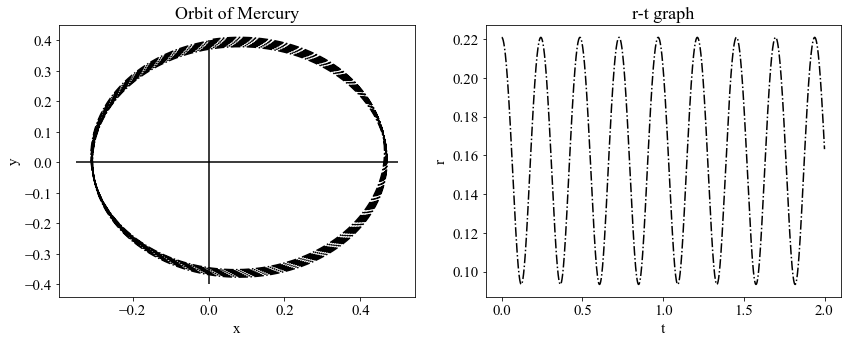

In [5]:
fig, (ax,ax2) = plt.subplots(1,2,figsize=(14,5))
ax.plot(x, y,'k-.',ms=0.01);
ax.hlines(0,-0.35,0.5)
ax.vlines(0,-0.4,0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Orbit of Mercury')

ax2.plot(t, r,'k-.',ms=0.01);
ax2.set_xlabel('t')
ax2.set_ylabel('r')
ax2.set_title('r-t graph');


In [6]:
## find the theta of each further range
smaflag = []
for i in range(0,len(drdt)-1):
    if   drdt[i]<=0 and drdt[i+1]>0:
        smaflag += [i]

In [7]:
t_sma, x_sma, y_sma = t[smaflag], x[smaflag], y[smaflag]
# print(len(t_sma),len(x_sma),len(y_sma))

r_sma = np.sqrt(x_sma**2 + y_sma**2)
theta = np.arccos(x_sma/r_sma)*y_sma/abs(y_sma)

A = np.array([t_sma,np.ones(len(t_sma))]).T
b = theta.reshape(-1,1)

### fitting omega using least square
omega, const = np.linalg.lstsq(A,b, rcond=None)[0]
theta_fit = t_sma*omega + const
print("precession rate = {:2.2f} rad/yr".format(float(omega)))

precession rate = 0.19 rad/yr


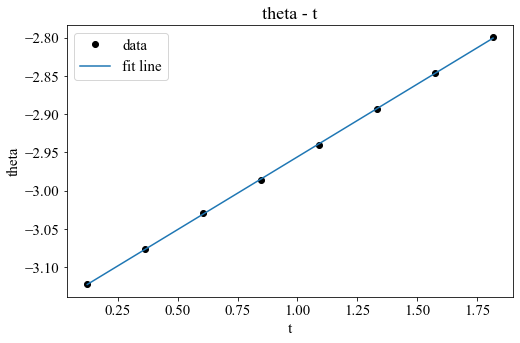

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t_sma, theta,'ko', label='data')
ax.plot(t_sma,theta_fit, label="fit line")
ax.set_xlabel('t')
ax.set_ylabel('theta')
ax.set_title('theta - t')
ax.legend();

In [9]:
## Using different alpha
alphalist = np.arange(0.002,0.01, 0.001)
omegalist = np.zeros(len(alphalist))
for k, al in enumerate(alphalist):
    a = al
    dt = 0.0001
    t = np.arange(0,2+dt,dt)
    x, y, vx,vy = rk4(F,Y0,t,args=(a))

    r = x**2 + y**2
    drdt = np.diff(r)/dt    

    ## find the furthest range
    smaflag = []
    for i in range(0,len(drdt)-1):
        if   drdt[i]<=0 and drdt[i+1]>0:
            smaflag += [i]

    t_sma, x_sma, y_sma = t[smaflag], x[smaflag], y[smaflag]

    r_sma = np.sqrt(x_sma**2 + y_sma**2)
    theta = np.arccos(x_sma/r_sma)*y_sma/abs(y_sma)

    A = np.array([t_sma,np.ones(len(t_sma))]).T
    b = theta.reshape(-1,1)

    ### fitting omega using least square
    omegalist[k], const = np.linalg.lstsq(A,b, rcond=None)[0]

In [10]:
A = alphalist.reshape(-1,1)
b = omegalist.reshape(-1,1)

### fitting omega using least square
C = float(np.linalg.lstsq(A,b, rcond=None)[0])
print('C = {:.2f}'.format(C))

C = 219.97


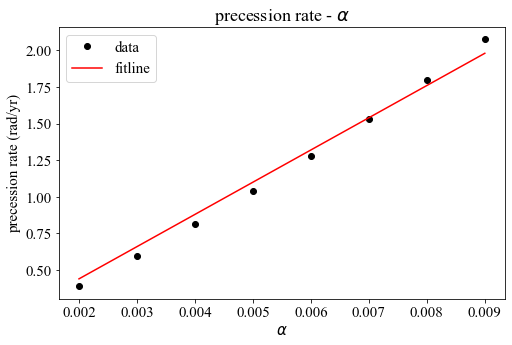

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(alphalist, omegalist,'ko', label='data')
ax.plot(alphalist, C*alphalist,'r-', label = "fitline")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('precession rate (rad/yr)')
ax.set_title(r'precession rate - $\alpha$')
ax.legend();

In [12]:
precrate = alpha_true*C
print('The extrapolated precession rate of Mercury is {:.2e} rad/yr'.format(precrate))

The extrapolated precession rate of Mercury is 2.42e-06 rad/yr


<font size=6 color=red> 可以采用不同的方法、步长去比较误差的大小，也可以通过计算alpha=0时是否有进动，或者多选取几个周期看总能量是否守恒来评估算法的正确性。